<a href="https://colab.research.google.com/github/abrahammathews2000/Size_of_HII_region/blob/main/Galaxy_ASG1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import scipy
from scipy import constants
from scipy import special
from scipy import integrate
import math
import matplotlib.pyplot as plt

plt.style.use('default')

In [ ]:
# Constants

e = constants.e 
me = constants.m_e
c = constants.c
pi = math.pi
h = constants.Planck
k = constants.Boltzmann
Ry = constants.Rydberg
Ry_energy = h*c*Ry
Ry_energy_eV = Ry_energy/e
#print("Ry energy (eV) = ",Ry_energy_eV)
Ry_freq = Ry_energy/h
#print("Ry_freq = ",Ry_freq)

pc = 3.0856776 * (10**16) #m

In [ ]:
#Size of Star in pc
(13.4*6*(10**8))/pc #(Radius of O star in parsec)

2.605586533084338e-07

In [ ]:
# Setting up numpy arrays with information related to stars
# Such as spectral type, surface temperature and radius
spec_type = np.array(['O5','B3','A1','F2','G8','K7','M7'])
temp = np.array([42000,18800,9400,7050,5310,4150,2860])
Rsun = 696340 * (10**3)
radius = np.array([13.4,3.8,2.1,1.4,0.96,0.74,0.2]) * Rsun                
#print(spec_type)
#print(temp)
#print(radius)

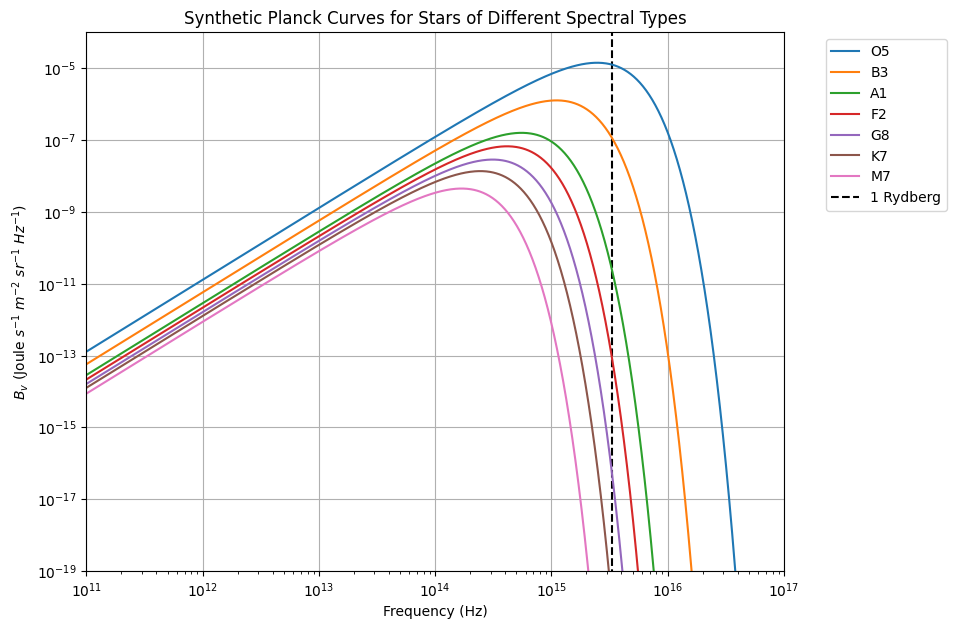

In [ ]:
# Code to plot the Planck's function for different temperature
def B(v,T):
    t1 = (2*h*np.power(v,3))/(c**2)
    t2 = 1/(np.exp((h*v)/(k*T))-1)
    return(t1*t2)

v = np.logspace(10,16.6,1000)
fig = plt.figure(figsize = (9,7))

for i in np.arange(len(temp)):
    plt.plot(v,B(v,temp[i]),label = f"{spec_type[i]}")


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$B_{v}$ (Joule $s^{-1}$ $m^{-2}$ $sr^{-1}$ $Hz^{-1}$)")


plt.xlim(10**11,10**17)
plt.ylim(10**-19,10**-4)

plt.vlines(Ry_freq,0,10**-4,linestyles='dashed',label = '1 Rydberg') #B(Ry_freq,42000))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Synthetic Planck Curves for Stars of Different Spectral Types")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()


**Calculation of NLyman**


In [ ]:
#Calculation of number of photons having energy greater than or equal to 13.6 eV
def calc_NLyman(v,temp,radius):
    return((B(v,temp)*4*pi*(radius**2)*4*pi)/(h*v))

NLyman = np.zeros(len(temp))
for i in np.arange(len(temp)):
    T = temp[i]
    R = radius[i]
    I = integrate.quad(calc_NLyman,Ry_freq,10**16.6,args = (T,R)) #UL = 10**16.6
    I_array = np.array(I)
    #print("I = ",I_array[0])
    print(I_array[0])
    NLyman[i] = I_array[0]
print(NLyman)

1.140480532318365e+50
2.9763164020708205e+46
9.102255521235787e+41
1.0904718888147724e+39
2.455537015886631e+35
2.761511551054866e+31
4.82362776641825e+22


**Radius of Stromgen radius**

In [ ]:
#Calculation of Stromgen Radius
def calc_Rs(noPhotons):
    alphaH = 3*(10**(-13))*(10**(-2))**3 #m^3 s^-1
    n = 1000/((10**(-2))**3) #m^(-3)
    Rs = ((3*noPhotons)/(4*pi*alphaH*(n**2)))**(1/3)
    Rs = Rs/pc
    return(Rs)


sizeHII = np.zeros(len(NLyman))

for i in np.arange(len(NLyman)):
    sizeHII[i] = calc_Rs(NLyman[i])
    print(sizeHII[i])

print("sizeHII = ",sizeHII)

1.456382515148721
0.09306917483213603
0.002910465831983511
0.000309113274440819
1.8805937679979077e-05
9.077406527339603e-07
1.0932112517740085e-09
sizeHII =  [1.45638252e+00 9.30691748e-02 2.91046583e-03 3.09113274e-04
 1.88059377e-05 9.07740653e-07 1.09321125e-09]


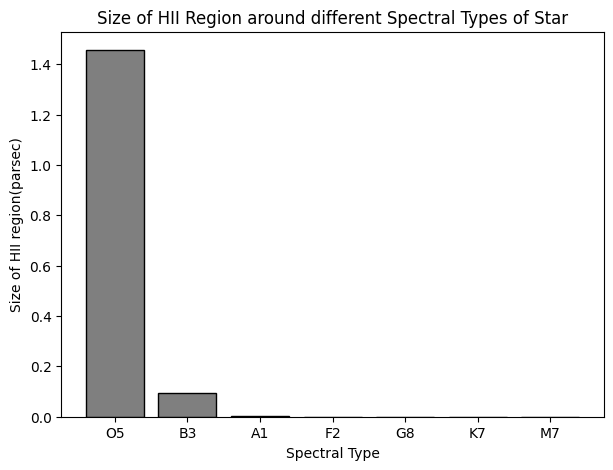

In [ ]:
#Plotting the graph between size of HII Region and the spectral types of the respective star
fig = plt.figure(figsize = (7,5))

plt.bar(spec_type,sizeHII,color = 'tab:gray',edgecolor = 'black')
plt.xlabel("Spectral Type")
plt.ylabel("Size of HII region(parsec)")
plt.title("Size of HII Region around different Spectral Types of Star")
plt.show()